# Task-1
 Identify potential customer segmentation using RFM Model and provide some meaningful insights from each segment

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df_1 = pd.read_excel('/content/sales_data.xlsx')
df_1.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50


In [ ]:
df_1.shape

(5000, 40)

In [ ]:
df_1.isnull().sum(axis=0)

CustomerID                   0
TOTAL_ORDERS                 0
REVENUE                      0
AVERAGE_ORDER_VALUE          0
CARRIAGE_REVENUE             0
AVERAGESHIPPING              0
FIRST_ORDER_DATE             0
LATEST_ORDER_DATE            0
AVGDAYSBETWEENORDERS         0
DAYSSINCELASTORDER           0
MONDAY_ORDERS                0
TUESDAY_ORDERS               0
WEDNESDAY_ORDERS             0
THURSDAY_ORDERS              0
FRIDAY_ORDERS                0
SATURDAY_ORDERS              0
SUNDAY_ORDERS                0
MONDAY_REVENUE               0
TUESDAY_REVENUE              0
WEDNESDAY_REVENUE            0
THURSDAY_REVENUE             0
FRIDAY_REVENUE               0
SATURDAY_REVENUE             0
SUNDAY_REVENUE               0
WEEK1_DAY01_DAY07_ORDERS     0
WEEK2_DAY08_DAY15_ORDERS     0
WEEK3_DAY16_DAY23_ORDERS     0
WEEK4_DAY24_DAY31_ORDERS     0
WEEK1_DAY01_DAY07_REVENUE    0
WEEK2_DAY08_DAY15_REVENUE    0
WEEK3_DAY16_DAY23_REVENUE    0
WEEK4_DAY24_DAY31_REVENUE    0
TIME_000

In [ ]:
df_1['REVENUE'] = df_1['REVENUE'].astype(int)
df_1['AVGDAYSBETWEENORDERS'] = df_1['AVGDAYSBETWEENORDERS'].astype(int)

In [ ]:
df_1.sort_values(by='FIRST_ORDER_DATE', ascending= True, inplace=True)
df_1

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
3192,5184,11,1549,140.82,13.97,1.27,2014-02-01,2021-07-01,246,116,...,88.99,649.04,0,3,1,7,0.0,208.94,129.00,1211.08
1151,110135,4,206,51.61,4.95,1.24,2014-02-01,2021-10-21,704,4,...,93.50,0.00,2,1,0,1,93.5,53.95,0.00,59.00
1946,13952,10,959,95.97,54.91,5.49,2014-02-02,2021-09-23,279,32,...,515.56,166.08,0,1,4,5,0.0,193.99,428.56,337.11
2848,45523,3,458,152.73,6.99,2.33,2014-02-02,2021-07-26,910,91,...,0.00,320.19,0,2,1,0,0.0,320.19,138.00,0.00
4019,7307,16,1326,82.90,23.88,1.49,2014-02-02,2021-04-01,163,207,...,412.09,48.60,0,0,3,13,0.0,0.00,214.09,1112.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,69325,1,325,325.50,0.00,0.00,2021-10-24,2021-10-24,0,1,...,0.00,325.50,0,1,0,0,0.0,325.50,0.00,0.00
899,103023,1,221,221.89,5.99,5.99,2021-10-24,2021-10-24,0,1,...,0.00,221.89,0,0,1,0,0.0,0.00,221.89,0.00
902,103242,1,221,221.00,0.00,0.00,2021-10-24,2021-10-24,0,1,...,0.00,221.00,0,1,0,0,0.0,221.00,0.00,0.00
881,99412,1,230,230.00,0.00,0.00,2021-10-24,2021-10-24,0,1,...,0.00,230.00,0,0,1,0,0.0,0.00,230.00,0.00


In [ ]:
Latest_Date = dt.datetime(2021,10,24)

In [ ]:
df_1['FIRST_ORDER_DATE'] = pd.to_datetime(df_1['FIRST_ORDER_DATE'])


In [ ]:
RFMScores = df_1.groupby(['CustomerID']).agg({'FIRST_ORDER_DATE': lambda x:(Latest_Date - x.max()).days,'TOTAL_ORDERS': lambda x: x, 'REVENUE': lambda x : x})

In [ ]:
RFMScores.rename(columns={'FIRST_ORDER_DATE': 'Recency',  
                         'REVENUE': 'Monetary'}, inplace=True)

In [ ]:
RFMScores.rename(columns={'TOTAL_ORDERS': 'Frequency'}, inplace = True)
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,1,600,61,34847
1,2,984,59,32486
2,3,1347,53,24178
3,4,1849,84,18554
4,5,2128,26,16884


In [ ]:
RFMScores.Recency.describe()

count    5000.000000
mean     1159.682600
std       936.804424
min         0.000000
25%       340.000000
50%       847.500000
75%      2016.000000
max      2822.000000
Name: Recency, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


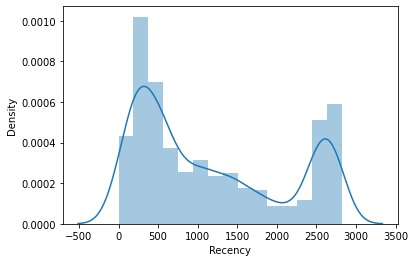

In [ ]:
a = RFMScores['Recency']

ax = sns.distplot(a)

In [ ]:
RFMScores.Frequency.describe()

count    5000.00000
mean       12.87040
std        12.67988
min         1.00000
25%         3.00000
50%         8.00000
75%        20.00000
max       156.00000
Name: Frequency, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


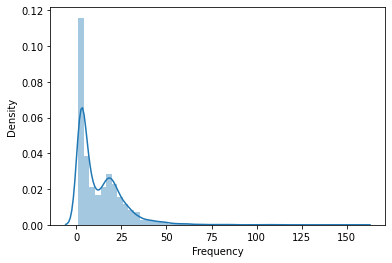

In [ ]:
b = RFMScores.query('Frequency < 5000')['Frequency']
bx = sns.distplot(b)

In [ ]:
RFMScores.Monetary.describe()

count     5000.000000
mean      1680.951600
std       1998.637336
min         38.000000
25%        315.000000
50%        966.000000
75%       2492.500000
max      34847.000000
Name: Monetary, dtype: float64

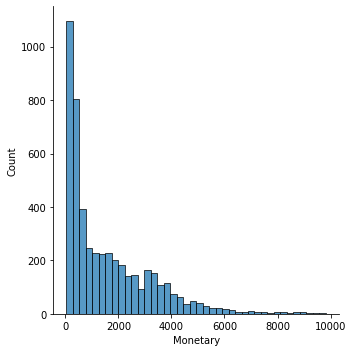

In [ ]:
c = RFMScores.query('Monetary < 10000')['Monetary']

cx = sns.displot(c)

In [ ]:
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
quantiles

{'Frequency': {0.25: 3.0, 0.5: 8.0, 0.75: 20.0},
 'Monetary': {0.25: 315.0, 0.5: 966.0, 0.75: 2492.5},
 'Recency': {0.25: 340.0, 0.5: 847.5, 0.75: 2016.0}}

In [ ]:
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
1,600,61,34847,2,1,1
2,984,59,32486,3,1,1
3,1347,53,24178,3,1,1
4,1849,84,18554,3,1,1
5,2128,26,16884,4,1,1


In [ ]:
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
1,600,61,34847,2,1,1,211,4
2,984,59,32486,3,1,1,311,5
3,1347,53,24178,3,1,1,311,5
4,1849,84,18554,3,1,1,311,5
5,2128,26,16884,4,1,1,411,6


In [ ]:
Loyalty_Level = ['Champions', 'Potential_customers', 'Need_attention']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 3, labels = Loyalty_Level,duplicates='drop')
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,1,600,61,34847,2,1,1,211,4,Champions
1,2,984,59,32486,3,1,1,311,5,Champions
2,3,1347,53,24178,3,1,1,311,5,Champions
3,4,1849,84,18554,3,1,1,311,5,Champions
4,5,2128,26,16884,4,1,1,411,6,Champions


In [ ]:
RFMScores['RFM_Loyalty_Level'].value_counts()

Potential_customers    2305
Champions              1800
Need_attention          895
Name: RFM_Loyalty_Level, dtype: int64

In [ ]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.0 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=b322eecd22692e1ef0c304c74e437e9d3ed6e360322757509aa6f18d01bf3998
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj

#Recency Vs Frequency
graph = RFMScores.query("Monetary < 3000 and Frequency < 3000")

plot_data = [
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Need_attention'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Need_attention'")['Frequency'],
        mode='markers',
        name='Need_attention',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.9
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Potential_customers'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Potential_customers'")['Frequency'],
        mode='markers',
        name='Potential_customers',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.5
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Champions'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Champions'")['Frequency'],
        mode='markers',
        name='Champions',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.5
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [ ]:
#Frequency Vs Monetary
graph = RFMScores.query("Monetary < 5000 and Frequency < 4000")

plot_data = [
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Need_attention'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Need_attention'")['Monetary'],
        mode='markers',
        name='Need_attention',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Potential_customers'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Potential_customers'")['Monetary'],
        mode='markers',
        name='Potential_customers',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.5
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Champions'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Champions'")['Monetary'],
        mode='markers',
        name='Champions',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.7
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [ ]:
#Recency Vs Monetary
graph = RFMScores.query("Monetary < 4000 and Frequency < 4000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Need_attention'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Need_attention'")['Monetary'],
        mode='markers',
        name='Need_attention',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Potential_customers'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Potential_customers'")['Monetary'],
        mode='markers',
        name='Potential_customers',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Champions'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Champions'")['Monetary'],
        mode='markers',
        name='Champions',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.7
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [ ]:
RFMScores[["Recency", "Frequency", "Monetary"]].agg(["mean"])

,Recency,Frequency,Monetary
mean,1159.6826,12.8704,1680.9516


In [ ]:
RFMScores[["RFM_Loyalty_Level","Recency", "Frequency", "Monetary"]].groupby("RFM_Loyalty_Level").agg(["mean","count","sum"])

Recency                 Frequency               \
                            mean count      sum       mean count    sum   
RFM_Loyalty_Level                                                         
Champions            1000.837222  1800  1801507  24.971667  1800  44949   
Potential_customers   929.219089  2305  2141850   6.971800  2305  16070   
Need_attention       2072.688268   895  1855056   3.724022   895   3333   

                        Monetary                 
                            mean count      sum  
RFM_Loyalty_Level                                
Champions            3410.754444  1800  6139358  
Potential_customers   840.865944  2305  1938196  
Need_attention        365.591061   895   327204

In [ ]:
RFMScores['RFM_Loyalty_Level'].value_counts()

Potential_customers    2305
Champions              1800
Need_attention          895
Name: RFM_Loyalty_Level, dtype: int64

# K-means clustering

In [ ]:
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



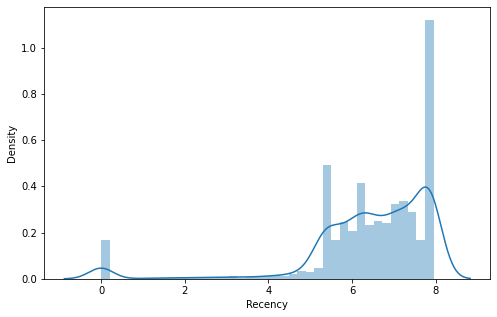

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
fig, ax = plt.subplots(figsize=(8, 5))
sns.distplot(Recency_Plot, ax = ax)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



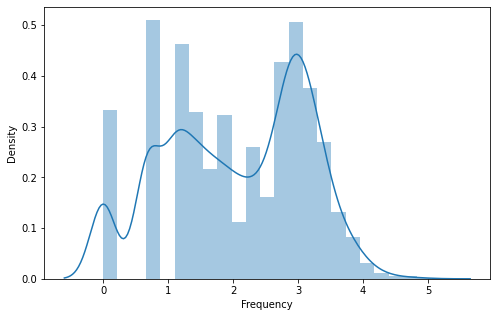

In [ ]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
fig, ax = plt.subplots(figsize=(8, 5))
sns.distplot(Frequency_Plot, ax = ax)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



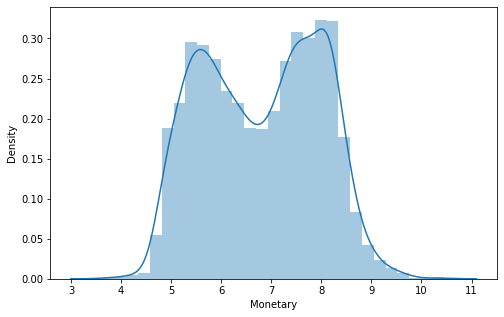

In [ ]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
fig, ax = plt.subplots(figsize=(8, 5))
sns.distplot(Monetary_Plot, ax = ax)

In [ ]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)

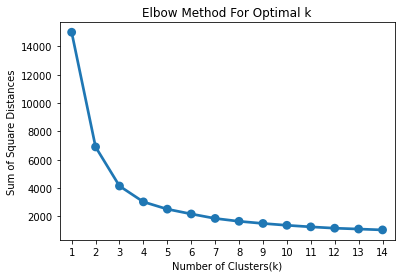

In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
sns.set(rc = {'figure.figsize':(1,8)})
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 5, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFMScores['Cluster'] = KMean_clust.labels_
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
CustomerID,,,,,,,,,,
1,600,61,34847,2,1,1,211,4,Champions,0
2,984,59,32486,3,1,1,311,5,Champions,0
3,1347,53,24178,3,1,1,311,5,Champions,0
4,1849,84,18554,3,1,1,311,5,Champions,0
5,2128,26,16884,4,1,1,411,6,Champions,0


In [ ]:
RFMScores['Cluster'].value_counts()

0    1755
4    1083
1    1082
3     867
2     213
Name: Cluster, dtype: int64

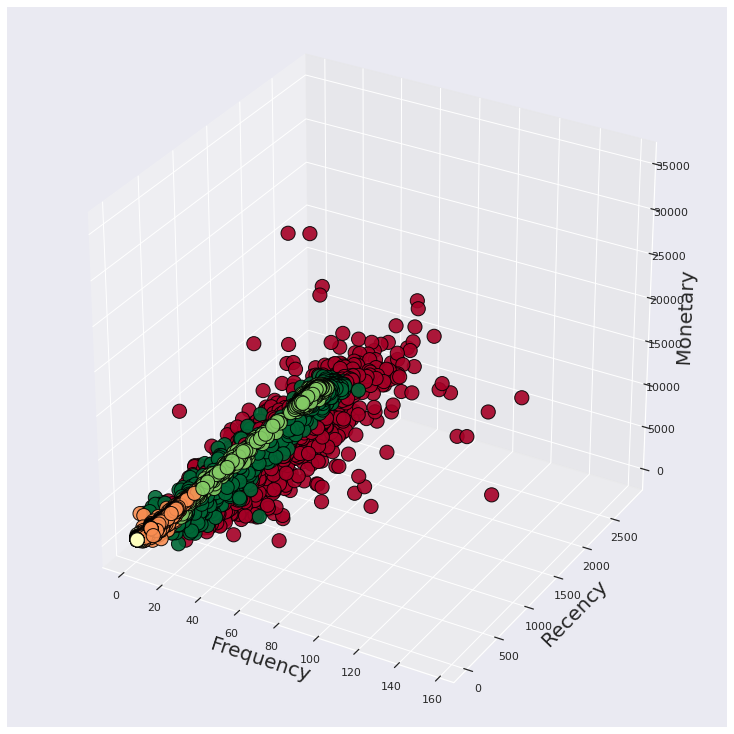

In [ ]:
plt.rcParams['figure.figsize'] = (10,10)


fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig)
plt.cla()
ax.scatter(RFMScores['Frequency'], RFMScores['Recency'], RFMScores['Monetary'],
           c = RFMScores['Cluster'],
           s = 200,
           cmap = 'RdYlGn',
           alpha = 0.9,
           edgecolor = 'black')

ax.set_xlabel('Frequency',
              fontsize = 20)
ax.set_ylabel('Recency',
              fontsize = 20)
ax.set_zlabel('Monetary',
              fontsize = 20)
plt.show()

# Questions:-
1. What decision company should take based on the data insights?

2. Demonstrate your understanding of the data. 

3. Do EDA (Exploratory Data Analysis) and provide a summary 

4. Explain your data modelling approach.

5. What sort of modelling & segmentation is best fit for this data?

# Answers:-

1. RFM segmentation and analysis is used by marketers and catalog retailers.

2.   From the above data we can find "Champion" buyers for specific products and categories. Send hyper-targeted deals and discounts that are relevant and personalized to each customer segment to guarantee success.

3.    Identify "Potential Customer" who are most likely to engage on specific channels.Group customers into different RFM customer segments and see which segments are likely to engage with your campaigns

4.  Prevent customer churn by identifying and auto-targeting "Need Attention" customers. Set recurring campaigns that dynamically target churn-risk customers.

5. Because of the above RFM analysis we can also get answers to questions like:-

       A.     Who are your best customers?
       Ans. = We have the "Champion" customers.

       B.     Which of your customers could contribute to your churn rate?  
       Ans. = For question like this we can say the "Need attention" category customers are the answer. 

       C.     Who has the potential to become valuable customers?
       Ans. = As we have found out the Potential category customers have more chances of becoming valuable/champion customers.

       D.     Which of your customers can be retained?
       Ans.   The "Potential" customers can be retained.

       E.     Which of your customers are most likely to respond to engagement campaigns?
       Ans. = The "Champion" customers are most likely to respond to engagement campaigns.




**My data modelling approach is as follows**,

1. Understanding of Data :- Here I went through the data, and tried to understand things like the type of data(whether it is object, float, str or int), contents, number of columns, number of rows, checking of null_values etc.

2. Assigning Recency Score :- Here I'm assigning 'First_order_date' as 'Recency'.

3. Assigning Frequency Score :-Here I have 'Assigned TOTAL_ORDERS' as 'Frequency'.

4. Assigning Monetary Score :- Here I have Assigned 'Revenue' as 'Monetary'.

5. Calculating RFMScores :- 1st I fond values of 'R', 'F', 'M', individually. Then then I joined them in a str form and save it in a new column called 'RFMGroup', then I added thoes strings and saved the output in a new column called 'RFMScores'

6. Dividing the Customers :- By using the 'RFMScores' I have now divided the Customers in 'Champions', 'Potential customers' and 'Need attention' and saved the data in a new column in "RFM_Loyalty_Level".

7. Clustering :- By using 'K-means' clusterings I have created 5 clusters which was found out with the help of 'Elbow curve', then saved the clusters data in a newcolumn called Clusters and used it for 3D plotting 

8. Plotting :- Now I have plotted graphs of Recency, Frequency and Monetary (separately and with respect to each other) for data visualization.
